### 5.3 Bag of Words (BoW) 

In [ ]:
# count vectorizer iceriye aktar
from sklearn.feature_extraction.text import CountVectorizer

# veri seti olustur
documents = [
    "kedi bahcede",
    "kedi evde"]

# vectorizer tanimla 
vecto = CountVectorizer()

# metni sayisal vectorlere cevir 
X = vecto.fit_transform(documents)

# kelime kumesi olsuturma [bahcede, evde, kedi]
feature_names = vecto.get_feature_names_out()
print(feature_names)

# vector temsili 
print(X.toarray())


['bahcede' 'evde' 'kedi']
[[1 0 1]
 [0 1 1]]


### 5.4 BoW_imdb_datasets part 1

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
import re 
from collections import Counter

df = pd.read_csv("datasets/IMDB Dataset.csv")

# metin temizleme 
documents = df["review"]
labels =df["sentiment"] #posi or neg 

# metin temizleme 

def clean_text(text):

    # buyuk kucuk harf cevrimi
    text = text.lower()

    # rakamlari temizle
    text = re.sub(r"[^\w\s]", "", text)

    # kisa kelimeleri temizlenmesi
    text = " ".join([word for word in text.split() if len(word) > 2])

    # stop kelimeleri temizle
    stop_words = ['the', 'and', 'this', 'that', 'with','was','for', 'but', 'his']
    text = " ".join([word for word in text.split() if word not in stop_words])
    

    return text # temizlenms metin

# metinleri temizle 
cleaned_doc = [clean_text(doc) for doc in documents]

### 5.5 part 2 

In [16]:
# BoW 
vectorizer = CountVectorizer()

# metin -> sayisal hale getir 
X = vectorizer.fit_transform(cleaned_doc[:75])

# vektor temsili goster 
print(X.toarray())

df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# kelime frenkansini bul 
word_freq = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# ilk 5 kelimeyi print et 
most_5 = Counter(word_freq).most_common(5)
print(most_5)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[('movie', 123), ('film', 98), ('not', 96), ('its', 83), ('are', 80)]


### 5.6 TF-IDF 

In [3]:
import pandas as pd 
import numpy as np 

from sklearn.feature_extraction.text import TfidfVectorizer

# ornek belge olustur
documents = [
    "kedi bahcede",
    "kedi evde",
    "kedi bahcede kedi",
    "kedi evde kedi",
]
# vektorizer tanimla
tfidf_vectorizer = TfidfVectorizer()

# meinleri sayisal hale cevir 
X = tfidf_vectorizer.fit_transform(documents)

# kelime kumesi incele
feature_names = tfidf_vectorizer.get_feature_names_out()

# vektor temsilini incele
print(f"vektor temsil:\n{X.toarray()}")

df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)

# ortalama tf idf degerlerine bakalım 
tf_idf = df_tfidf.mean(axis=0)

print(f"tf_idf:\n{tf_idf}")

vektor temsil:
[[0.83388421 0.         0.55193942]
 [0.         0.83388421 0.55193942]
 [0.60276058 0.         0.7979221 ]
 [0.         0.60276058 0.7979221 ]]
tf_idf:
bahcede    0.359161
evde       0.359161
kedi       0.674931
dtype: float64


### 5.8 Spam Datasets_Tf-idf

In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")

df = pd.read_csv("datasets/sms_spam.csv")

# veri temizleeme 
text = df["text"]
def clean_text(text):
        text = text.lower()
        text = re.sub(r"[^\w\s]", "", text)
        text = " ".join([word for word in text.split() if len(word) > 2])
        stop_words = set(stopwords.words("english"))
        text = " ".join([word for word in text.split() if word not in stop_words])
        return text # temizlenms metin
# metinleri temizle
cleaned_doc = [clean_text(doc) for doc in text]

# tfidf 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_doc)

# kelime kumesi incele
feature_names = vectorizer.get_feature_names_out()
tfidf_score = X.mean(axis=0).A1 # her kelimnin ortalama tf-idf degeri 

# tfidf skorlarını iceren bir df olsutur
df_tfidf = pd.DataFrame({"words": feature_names, "tfidf_score": tfidf_score})

# skorlarini sirala ve sonucları incele

df_tfidf_sorted = df_tfidf.sort_values(by="tfidf_score", ascending=False)
print(df_tfidf_sorted.head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mfurk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     words  tfidf_score
1870  call     0.019546
3631   get     0.013975
4236   ill     0.012983
2233  come     0.011805
2829  dont     0.011044
5003  ltgt     0.010865
3710  good     0.010063
4660  know     0.009999
3734   got     0.009841
4841  like     0.009737


### 5.9 N-Gram Model 

In [ ]:
# "bu bir ornek metindir"
    # unigram (n=1) 'Bu' , 'bir' , 'ornek' , 'metindir'
    # bigram (n=2) 'bu bir', 'bir ornek', 'ornek metindir'
    # trigram (n=3) 'bu bir ornek', 'bir ornek metindir'

    # ngram (n=4) 'bu bir ornek metindir'

# hem modelleme yapılabilir 
# hemde sınıflandırma yapılabilir 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# ornek metib 
documents = [
    "Bu çalısma NGram çalısmasıdır.",
    "Bu çalısma NGram çalısmasıdır. Bu bir ornek metindir.",
]

# unigram, bigram, trigram seklinde 3 farkli N degerine sahip ngram modeli 
vec_unigram = CountVectorizer(ngram_range=(1, 1))
vec_bigram = CountVectorizer(ngram_range=(2,2))
vec_trigram = CountVectorizer(ngram_range=(3,3))

# unigram 
X_unigram = vec_unigram.fit_transform(documents)
unigram_feature_names = vec_unigram.get_feature_names_out()

# bigram 
X_bigram = vec_bigram.fit_transform(documents)
bigram_features = vec_bigram.get_feature_names_out()

# trigram 
X_trigram = vec_trigram.fit_transform(documents)
bigram_features = vec_trigram.get_feature_names_out()

# sonucların incelenmesi
print("Unigram Feature Names: \n", unigram_feature_names )
print("Bigram Feature Names: \n", bigram_features)
print("Trigram Feature Names: \n", bigram_features)


Unigram Feature Names: 
 ['bir' 'bu' 'metindir' 'ngram' 'ornek' 'çalısma' 'çalısmasıdır']
Bigram Feature Names: 
 ['bir ornek metindir' 'bu bir ornek' 'bu çalısma ngram'
 'ngram çalısmasıdır bu' 'çalısma ngram çalısmasıdır'
 'çalısmasıdır bu bir']
Trigram Feature Names: 
 ['bir ornek metindir' 'bu bir ornek' 'bu çalısma ngram'
 'ngram çalısmasıdır bu' 'çalısma ngram çalısmasıdır'
 'çalısmasıdır bu bir']


### 5.11 Word Embeddings Modelleri

In [ ]:
# Word2Vec
# GloVe
# FastText
# BERT

"""
word2vec = (google)
fasttext = (facebook)
"""

### 5.12 WEM PY

Note: you may need to restart the kernel to use updated packages.


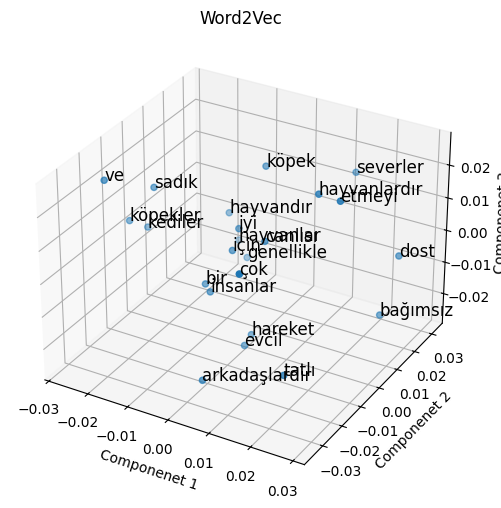

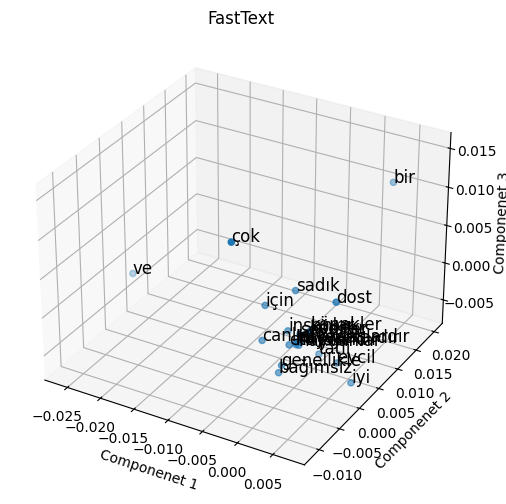

In [2]:
%pip install gensim -q

import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA

from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess

# ornek veri seti olsutur 
sentences = [ 
    "Köpek çok tatlı bir hayvandır.",
    "Köpekler evcil hayvanlardır.",
    "Kediler genellikle bağımsız hareket etmeyi severler,",
    "Köpekler sadık ve dost canlısı hayvanlardır.",
    "Hayvanlar insanlar için iyi arkadaşlardır.",
]

tokenized_sentences = [ simple_preprocess(sentence) for sentence in sentences]

# word2vec 
word2_vec_model = Word2Vec(sentences = tokenized_sentences, vector_size = 100,
                            window = 5, min_count = 1, sg=0)

# fasttext
fasttext_model = FastText(sentences = tokenized_sentences, vector_size = 100,
                            window = 5, min_count = 1, sg=0)   

# gorsellestirme : PCA 

def plot_word_embedding(model, title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]

    # PCA
    pca = PCA(n_components=3)
    redduced_vectors = pca.fit_transform(vectors)
    
    # 3d gorsellestirme
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(111, projection = "3d")

    # vektorleri ciz 
    ax.scatter(redduced_vectors[:,0], redduced_vectors[:,1], redduced_vectors[:,2])

    # kelimeleri etiketle 
    for i, word in enumerate(words):
        ax.text(redduced_vectors[i,0],redduced_vectors[i,1],redduced_vectors[i,2], word , fontsize = 12)
    
    ax.set_title(title)
    ax.set_xlabel("Componenet 1")
    ax.set_ylabel("Componenet 2")
    ax.set_zlabel("Componenet 3")

plot_word_embedding(word2_vec_model, "Word2Vec")
plot_word_embedding(fasttext_model, "FastText")



### 5.13 WEM with IMDB datasets - Part 1

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
import re

df = pd.read_csv("datasets/IMDB Dataset.csv")
documents = df["review"]

# metin temizleme 
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+","", text) # sayiları temizle
    text = re.sub(r"[^\w\s]", "", text) # ozel karakterleri temizle
    text = " ".join([word for word in text.split() if len(word) > 2])
    return text # temizlenms metin
cleaned_documents = [clean_text(doc) for doc in documents]

# metin tokenizasyonu
tokenized_documents = [simple_preprocess(doc) for doc in cleaned_documents]

### 5.14 WEM - Part 2

Text(0.5, 1.0, 'Word2Vec KMeans Clustering')

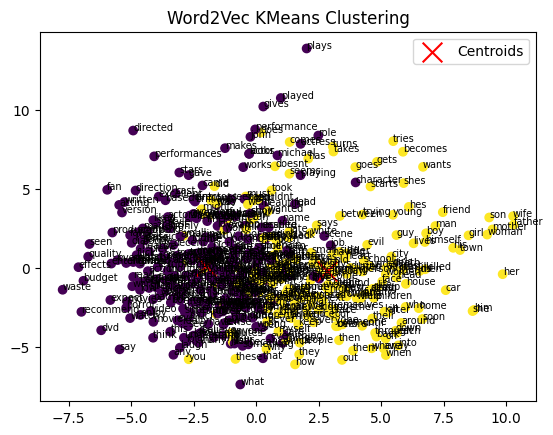

In [6]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#word2vec modeli tanımla 
model = Word2Vec(sentences= tokenized_documents, vector_size = 50, window=5, min_count = 1, sg = 0)
word_vec = model.wv

words = list(word_vec.index_to_key)[:500]
vectors = [word_vec[word] for word in words]

# clustering Kmeans k = 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(vectors)
clusters = kmeans.labels_

# PCA 50 -> 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# 2 d gorsellestirme
plt.figure()
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c=clusters, cmap="viridis")

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="red", marker="x", s=200, label="Centroids")
plt.legend()

# figure üzerinde kelimelerin eklenmesi
for i, word in enumerate(words):
    plt.text(reduced_vectors[i,0], reduced_vectors[i,1],word, fontsize=7)
plt.title("Word2Vec KMeans Clustering")


### 5.15 Transformers Tabanlı Metin Temsili

In [ ]:
# Neden transformes 
# - Bağlamıdaya iyi anlama
# - paralelişleme yeteneği
# - çeşitli nlp görevlerinde kullanılabilirlik
# - önceden egitilmis modellerin yeniden kullanımı 
# En bilindik Transformes Modelleri 
# - BERT
# - GPT

### 5.16 TTMT PY

In [4]:
%pip install transformers torch -q
from transformers import AutoTokenizer, AutoModel 
import torch 

# model ve tokenizer yukle 
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# input text ( metni ) tanimla 
text = "Transformers can be used for natural Language procesing."

# metni tokenlara cevirmek 
inputs = tokenizer ( text, return_tensors = "pt") # çıktı pytorch tensoru olarak return edilir

# modeli kullanarak metni temsili olustur 
with torch.no_grad():
    outputs = model(**inputs)

# modelin cıkısından son gizli durumu alalım 
last_hidden_state = outputs.last_hidden_state # tum token cıktılarını almak icin

# ilk tokenın embedding inin ve print ettirelim
first_token_embedding = last_hidden_state[0,0,:].numpy()

print(f"Metin Temsili: {first_token_embedding}")


Note: you may need to restart the kernel to use updated packages.


c:\Users\mfurk\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\mfurk\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mfurk\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adminis

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Metin Temsili: [-3.97788644e-01 -3.55294287e-01 -8.42563659e-02 -7.87362903e-02
 -5.46010017e-01 -2.43809819e-01  2.43172526e-01  3.16812247e-01
  1.26602158e-01 -4.00002003e-02 -1.63523436e-01 -4.32603732e-02
 -2.97251433e-01  2.24419653e-01 -2.75239497e-01 -1.11110829e-01
 -4.33152288e-01  8.27572882e-01  9.12351906e-02  3.04254591e-01
 -3.61495793e-01 -5.09547770e-01  4.19658601e-01 -1.52813628e-01
 -1.49592087e-01 -2.16260701e-01  2.34668136e-01 -3.32356989e-01
 -3.11230987e-01  1.85562193e-01 -7.22807646e-01  4.17121291e-01
 -1.86621636e-01 -6.58605814e-01  6.97881937e-01 -9.47604701e-02
  1.56141937e-01 -3.77318144e-01  5.36727346e-02  8.45705271e-02
 -4.39046621e-01 -2.75679473e-02  3.52789909e-01 -1.72756582e-01
 -6.02589905e-01  1.99863598e-01 -3.44016504e+00 -8.38682801e-02
 -6.21859014e-01 -2.99935907e-01 -1.82190135e-01  2.03326643e-01
 -9.69495028e-02  4.82829750e-01  2.12478280e-01  2.22912878e-01
 -5.43623008e-02  1.28253162e-01  4.04705077e-01  2.98791468e-01
 -2.741876

![ScreenS/5.17_MT.PNG](ScreenS/5.17_MT.PNG)